In [1]:
%matplotlib inline
import openmc
import os
os.environ['OPENMC_CROSS_SECTIONS']='/home/dresden/endfb-viii.0-hdf5/cross_sections.xml'
fuel = openmc.Material(name='fuel')
fuel.add_nuclide('U235', 1.0)
fuel.set_density('g/cm3', 10.0)

fuel2 = openmc.Material(name='fuel2')
fuel2.add_nuclide('U238', 1.0)
fuel2.set_density('g/cm3', 10.0)

water = openmc.Material(name='water')
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)

materials = openmc.Materials((fuel, fuel2, water))
materials.export_to_xml()

In [6]:
r_pin = openmc.ZCylinder(r=0.25)
fuel_cell = openmc.Cell (fill=fuel,region=-r_pin)
water_cell = openmc.Cell (fill=water,region=+r_pin)
pin_universe = openmc.Universe (cells=(fuel_cell,water_cell))

r_big_pin = openmc.ZCylinder(r=0.5)
fuel2_cell = openmc.Cell(fill=fuel2, region=-r_big_pin)
water2_cell = openmc.Cell(fill=water, region=+r_big_pin)
big_pin_universe = openmc.Universe(cells=(fuel2_cell,water2_cell))

all_water_cell = openmc.Cell(fill=water)
outer_universe = openmc.Universe(cells=(all_water_cell,))

lattice = openmc.HexLattice()
lattice.center = (0.,0.)
lattice.pitch = (1.25,)
lattice.outer = outer_universe
print (lattice.show_indices(num_rings = 4))


                  (0, 0)
            (0,17)      (0, 1)
      (0,16)      (1, 0)      (0, 2)
(0,15)      (1,11)      (1, 1)      (0, 3)
      (1,10)      (2, 0)      (1, 2)
(0,14)      (2, 5)      (2, 1)      (0, 4)
      (1, 9)      (3, 0)      (1, 3)
(0,13)      (2, 4)      (2, 2)      (0, 5)
      (1, 8)      (2, 3)      (1, 4)
(0,12)      (1, 7)      (1, 5)      (0, 6)
      (0,11)      (1, 6)      (0, 7)
            (0,10)      (0, 8)
                  (0, 9)


In [15]:
outer_ring = [big_pin_universe]*18
ring_1 = [pin_universe]*12
ring_2 = [pin_universe]*6
inner_ring =[pin_universe]

lattice.universes = [outer_ring,ring_1,ring_2,inner_ring]

print(lattice)

HexLattice
	ID             =	16
	Name           =	
	Orientation    =	y
	# Rings        =	4
	# Axial        =	None
	Center         =	(0.0, 0.0)
	Pitch          =	(1.25,)
	Outer          =	15
	Universes      
      14
    14  14
  14  13  14
14  13  13  14
  13  13  13
14  13  13  14
  13  13  13
14  13  13  14
  13  13  13
14  13  13  14
  14  13  14
    14  14
      14


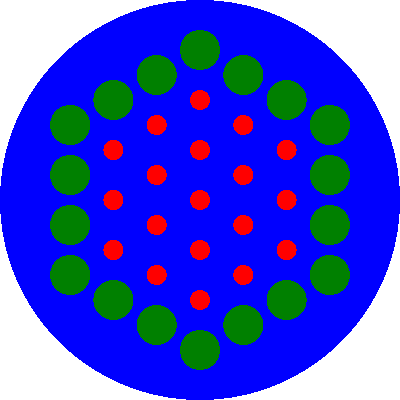

In [17]:
outer_surface=openmc.ZCylinder(r=5.0, boundary_type='vacuum')
main_cell = openmc.Cell(fill=lattice, region = -outer_surface)
geometry = openmc.Geometry([main_cell])
geometry.export_to_xml()

plot=openmc.Plot.from_geometry(geometry)
plot.color_by='material'
plot.colors = colors = {water:'blue',fuel:'red',fuel2:'green'}
plot.to_ipython_image()

In [19]:
batch=100
inactive=20
particles=100000

settings_file = openmc.Settings()
settings_file.batches = batch
settings_file.inactive = inactive
settings_file.particles = particles
settings_file.export_to_xml()

In [20]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################